<a href="https://colab.research.google.com/github/Neha609/Natural-Language-Processing-Projects/blob/gh-pages/Sentence_Sematics_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**About Dataset:** In attached data there are various headlines (Sentences) from various newspapers. 

**Your task is to build a model that can search the similar sentences from the data set.**

for example: "where are you currently residing?" is similar to "what is your address?"

if you pass query = " where are you currently residing ?"
Your model should be able to return like something below:
What is your current address?
Can you give me your current address?
Please provide me your address.
In which city you residing ............... and so on.

**The most similar sentence should be on top and follow the order.**

**1. Loading Dataset from Goggle Drive.**

In [ ]:
#Importing pandas and numpy Library to perform various operation on Dataset
import pandas as pd
import numpy as np

In [ ]:
#Loading csv file by using pandas in a DataFrame from Google Drive
News_CSV = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSet/news-text.csv')

**2. Exploring Data for Understanding Features**

In [ ]:
#Checking top 10 Records of DataFrame
News_CSV.head(10)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [ ]:
#Checking shape of our dataset 
News_CSV.shape

(1186018, 2)

In [ ]:
#Checking type of our dataset
type(News_CSV)

pandas.core.frame.DataFrame

In [ ]:
#Creating copy of our Dataset so that we can change and Modify as per our needs
Temp_News_CSV = News_CSV

In [ ]:
#Now i want to check my data via Year wise,as Year is not visibe in publish_date column so creating another column just for exploring purpose
Temp_News_CSV["year"] = Temp_News_CSV["publish_date"].astype(str).str[:4].astype(np.int64)
Temp_News_CSV.head()

,publish_date,headline_text,year
0,20030219,aba decides against community broadcasting lic...,2003
1,20030219,act fire witnesses must be aware of defamation,2003
2,20030219,a g calls for infrastructure protection summit,2003
3,20030219,air nz staff in aust strike for pay rise,2003
4,20030219,air nz strike to affect australian travellers,2003


In [ ]:
#Now making sure all Years are correct
Temp_News_CSV.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

Text(0.5, 1.0, 'Number of Articles per Year')

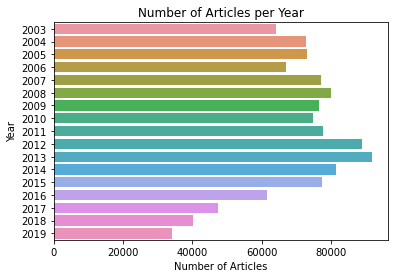

In [ ]:
#Now i want to check for every Year how many articles are present in my dataset,Let's check it via using below plot
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

with sns.color_palette("GnBu_d", 10):
    ax= sns.countplot(y="year",data=Temp_News_CSV)
    ax.set(xlabel='Number of Articles', ylabel='Year')
plt.title("Number of Articles per Year")


**3. Performing Sentence Embeddings**

Installing required packages and libraries which provide facility to create senetence embeddings directly from your data.

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 1.1MB 4.2MB/s 
     |████████████████████████████████| 3.0MB 8.3MB/s 
     |████████████████████████████████| 1.1MB 15.2MB/s 
     |████████████████████████████████| 890kB 13.3MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.7.2-cp36-none-any.whl size=91190 sha256=3af09cc807e5e5ed4da9beaf0f4511c0fbc1d12b833eb1abc7054b9c1b5528e8
  Stored in directory: /root/.cache/pip/wheels/4b/8f/23/7f93e91176acc7c2d651b54fa9f01e3624a47904145c4d133e
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=5930869cdab550155d4828452b01649914caad333779229461b1cb63bd686492
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
#Importing installed library
from sentence_transformers import SentenceTransformer

In [ ]:
#Initializing model 
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

100%|██████████| 245M/245M [00:12<00:00, 19.1MB/s]


**This framework provides an easy method to compute dense vector representations for sentences and paragraphs (also known as sentence embeddings). The models are based on transformer networks like BERT / RoBERTa / XLM-RoBERTa etc. and are tuned specificially meaningul sentence embeddings such that sentences with similar meanings are close in vector space.**

This particular solution can also be developed by using pre trained model of Google name **word2vec**. 



In [ ]:
#Just a small example how it works
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [ ]:
#Let's view the results generated by model
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-4.99964029e-01  2.00929224e-01  4.79733139e-01 -5.45872487e-02
 -3.20265412e-01 -1.18349835e-01  1.19828176e+00  6.53362125e-02
  2.56168783e-01 -6.80206418e-01 -2.65210181e-01  9.71703082e-02
 -2.19010562e-01 -4.23998982e-01 -1.44664207e-02 -2.27257952e-01
 -3.66329372e-01  4.29634675e-02 -2.45088339e-01 -1.15445745e+00
  1.01486623e+00 -4.86819208e-01 -3.97846997e-01  1.33469415e+00
  7.27640748e-01 -2.61948287e-01  9.74692225e-01  3.20754200e-01
  9.10782516e-02 -1.66287914e-01 -1.71081334e-01 -2.45369092e-01
 -2.78276563e-01  5.85470438e-01  2.47853994e-01 -5.16083360e-01
  8.40410769e-01 -1.11888134e+00 -1.02041578e+00 -2.46360078e-01
  3.75287533e-01 -4.89004552e-01  5.48438132e-01 -1.94786385e-01
 -3.49307030e-01  1.85087901e-02 -3.58535722e-02  3.46165925e-01
 -1.75415850e+00 -3.57942134e-01 -1.20965242e+00  2.49583617e-01
  7.49337852e-01 -3.55312467e-01 -5.63870370e-01 -8.27803910e-02
  2.31488

Now Let's work on Problem statement. The solution of problem statement can be achived by various/Multiple ways and later on we can stick on a single solution which better suits to our business requirement.

# **SOLUTION - 1**

This solution is developed by using using PyTorch library:

**Description:**  In this solution I will provide a function which will take a sentence from user as an input, and provide 10 most similar sentences from existing dataset. Number of output sentences can be changed as per the requirement.

In [ ]:
#Importing the libraries
from sentence_transformers import SentenceTransformer, util
import torch

In [ ]:
#Downloading a pretrained model
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

100%|██████████| 245M/245M [00:12<00:00, 19.1MB/s]


In [ ]:
#Now defining our dataset selecting only 100 records to make this process fast as Dataset is having 1186018 records which will take time in procesing 
#For quick response and working i am using 100 records and also converting it into List for forther processing.
corpus = News_CSV['headline_text'].iloc[:100].to_list()

In [ ]:
#Checking type of corpus
type(corpus)

list

In [ ]:
#Now creating Emeddings of sentences via using pretrained model
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

In [ ]:
#Creating a method which will accept a sentence in input and extract 10 most similar sentences from dataset
def SimilarSentence():
  user_input = input('Enter your sentence: ')
  queries = [user_input]
  top_k = 10
  for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    cos_scores = cos_scores.cpu()

    #We use torch.topk to find the highest 5 scores
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 10 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: %.4f)" % (score))


In [ ]:
#Calling SimilarSentence() method
SimilarSentence()

Enter your sentence: War is dangerous for health




Query: War is dangerous for health

Top 10 most similar sentences in corpus:
cemeteries miss out on funds (Score: 0.4144)
kelly disgusted at alleged bp ethanol scare (Score: 0.3102)
golf club feeling smoking ban impact (Score: 0.2948)
epa still trying to recover chemical clean up costs (Score: 0.2940)
girl injured in head on highway crash (Score: 0.2754)
council chief executive fails to secure position (Score: 0.2645)
businesses should prepare for terrorist attacks (Score: 0.2496)
big plan to boost paroo water supplies (Score: 0.2407)
dargo fire threat expected to rise (Score: 0.2394)
four injured in head on highway crash (Score: 0.2233)


# **SOLUTION - 2**

This solution is developed by using KMeans Clustering Algorithm:

**Description :** In this solution we are building groups/clusters of similar sentences. Value of K is selected 15 randomly, it can be changed as per the requirement.

In [ ]:
#We are working with same sentence embedder model which is already trained 
#That step is already mentioned above if you want you can skip this step I have written this only for remidings that 
#After this step we are moving ahead with different approach.
corpus_embeddings = embedder.encode(corpus)

In [ ]:
# We perform k-means clustering using sklearn, So let's import the library
from sklearn.cluster import KMeans

In [ ]:
#Here we are defining the number of clusters/classes in which we want to divide our dataset (It can be changed as per our need)
num_clusters = 15
#Initializing the model
clustering_model = KMeans(n_clusters=num_clusters)
#Fitting/Training our model with embedded dataset
clustering_model.fit(corpus_embeddings)
#Now assigning labels to cluster_assignment variable 
cluster_assignment = clustering_model.labels_
Clusters = clustering_model.predict(corpus_embeddings)

In [ ]:
#Let's Obtained an indexed list which maps our sentences with there clusters/classes
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [ ]:
#Let's view all clusters with there values/sentences
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['ambitious olsson wins triple jump', 'antic delighted with record breaking barca', 'bryant leads lakers to double overtime win', 'gold coast to hear about bilby project']

Cluster  2
['brigadier dismisses reports troops harassed in', 'council chief executive fails to secure position', 'crean tells alp leadership critics to shut up', 'low demand forces air service cuts']

Cluster  3
['big hopes for launceston cycling championship', 'german court to give verdict on sept 11 accused', 'greens offer police station alternative', 'griffiths under fire over project knock back', 'harrington raring to go after break', 'investigation underway into elster creek spill', 'irish man arrested over omagh bombing', 'man arrested after central qld hijack attempt', 'man charged over cooma murder', 'man fined after aboriginal tent embassy raid', 'man jailed over keno fraud', 'man with knife hijacks light plane']

Cluster  4
['act fire witnesses must be aware of defamation', 'businesses should p

In [ ]:
#Let's plot and visualize these clusters
#Importing required libraries for ploting the result of KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

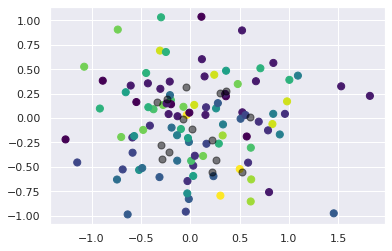

In [ ]:
#Designing the Plot style and fitting it with our dataset
plt.scatter(corpus_embeddings[:, 0], corpus_embeddings[:, 1], c=Clusters, s=50, cmap='viridis')

centers = clustering_model.cluster_centers_

#In below Plot centroids are also allocated by using Black colour.
plt.scatter(centers[:, 0], centers[:, 1], c='Black', s=50, alpha=0.5);

# **SOLUTION - 3**

This solution is also developed by using PyTorch Library:

**Description :**This approach is also like first solution but the differnce is there is no restriction on number of output sentences But because I don't want that it starts giving those sentences which are not having relevant rank, So I put a contstraint on time which can be changed according to the requirement/need. 

In [ ]:
#Importing time module to make restrictions on our model as per defined time and it will ask user to enter time five times.
import time

In [ ]:
#Below logic is also accepting input sentence from user and giving result as similar sentences 
#The difference from previous solution is here we made restriction on Time not number of sentences
n = 5
while n > 0:
        inp_question = input("Please enter a question: ")

        start_time = time.time()
        question_embedding = model.encode(inp_question, convert_to_tensor=True)
        hits = util.semantic_search(question_embedding, corpus_embeddings)
        end_time = time.time()
        hits = hits[0]  #Get the hits for the first query

        print("Input question:", inp_question)
        print("Results (after {:.3f} seconds):".format(end_time-start_time))
        for hit in hits[0:5]:
            print("\t{:.3f}\t{}".format(hit['score'], corpus[hit['corpus_id']]))

        print("\n\n========\n")
        n = n-1
        if n==0:
          break
  print("Five attempts completed")


Input question: cemeteries miss out on funds
Results (after 0.255 seconds):
	0.807	cemeteries miss out on funds
	0.474	council chief executive fails to secure position
	0.361	brigadier dismisses reports troops harassed in
	0.358	low demand forces air service cuts
	0.310	heavy metal deposits survey nearing end



Input question: low demand forces air service cuts
Results (after 0.076 seconds):
	0.798	low demand forces air service cuts
	0.477	brigadier dismisses reports troops harassed in
	0.417	crean tells alp leadership critics to shut up
	0.352	cemeteries miss out on funds
	0.339	commonwealth bank cuts fixed home loan rates



Input question: commonwealth bank cuts fixed home loan rates
Results (after 0.070 seconds):
	0.739	commonwealth bank cuts fixed home loan rates
	0.357	low demand forces air service cuts
	0.343	fed opp to re introduce national insurance
	0.301	aba decides against community broadcasting licence
	0.300	gilchrist backs rest policy



Input question: gilchrist backs 


So, This way we can achieve multiple solutions for above problem statement. 
More solution on which this solution can be acheived is :

*   we can generate sentence embeddings by using word2vec library and also Starspace for generating similar sentences.
*   This solution can also me achieved by ElasticSearch module.
*   We can also use Fasis model here for generate solution by other way.


**Thanks & Regards,**

**Neha Kumari.**
